<a href="https://colab.research.google.com/github/matheusfabiao/IA-para-todos/blob/main/RegressaoLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalando o módulo wget usando o gerenciador de pacotes pip
!pip3 install wget
# Baixando o arquivo CSV usando wget
!wget https://raw.githubusercontent.com/diogocortiz/Crash-Course-IA/master/RegressaoLinear/FuelConsumptionCo2.csv

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=8b5fc675919aa85f7019f60abbbadc0aa039a5fcadb6c53ef9b06a53f5706aeb
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
--2023-11-21 02:35:41--  https://raw.githubusercontent.com/diogocortiz/Crash-Course-IA/master/RegressaoLinear/FuelConsumptionCo2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/plain]
Saving to: ‘FuelConsumptionCo2.csv’

FuelConsumptionCo2. 100%[===================>]  70.93K  --.-KB/s    in 0.02s   

2023-11-21 02:35:41 (3.17 MB/s) - ‘FuelConsumptionCo2.csv’ saved [72629/72629]



In [2]:
# Importando bibliotecas necessárias
from matplotlib import pyplot as plt  # Para visualização de dados
import pandas as pd  # Para manipulação de dados
import pylab as pl  # Para personalização de gráficos
import numpy as np  # Para operações numéricas
from sklearn.linear_model import LinearRegression  # Para implementação do modelo de regressão linear
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  # Métricas de avaliação
from sklearn.model_selection import train_test_split  # Para dividir o conjunto de dados em treino e teste
from math import sqrt  # Para cálculos matemáticos

In [3]:
# Lendo o arquivo CSV usando a biblioteca pandas e armazenando os dados em um DataFrame
df = pd.read_csv('FuelConsumptionCo2.csv')

# Exibindo o DataFrame para visualizar os primeiros registros e entender a estrutura dos dados
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
# Utilizando o método describe() para gerar estatísticas descritivas do DataFrame
# Essas estatísticas incluem contagem, média, desvio padrão, mínimo, quartis e máximo
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
# Utilizando o método info() para obter informações sobre o DataFrame, como tipos de dados e valores não nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [6]:
# Criando um novo DataFrame 'motores' contendo apenas a coluna 'ENGINESIZE'
motores = df[['ENGINESIZE']]

# Criando um novo DataFrame 'co2' contendo apenas a coluna 'CO2EMISSIONS'
co2 = df[['CO2EMISSIONS']]

# Exibindo as primeiras linhas do DataFrame 'motores' para visualizar os dados da coluna 'ENGINESIZE'
motores.head()

,ENGINESIZE
0,2.0
1,2.4
2,1.5
3,3.5
4,3.5


In [7]:
# Dividindo os conjuntos de dados em conjuntos de treino e teste
# O parâmetro test_size=0.2 indica que 20% dos dados serão utilizados como conjunto de teste
# O parâmetro random_state=42 garante reprodutibilidade dos resultados
motores_treino, motores_teste, co2_treino, co2_teste = train_test_split(motores, co2, test_size=0.2, random_state=42)

# Verificando o tipo dos conjuntos de treino para a coluna 'ENGINESIZE'
type(motores_treino)

pandas.core.frame.DataFrame

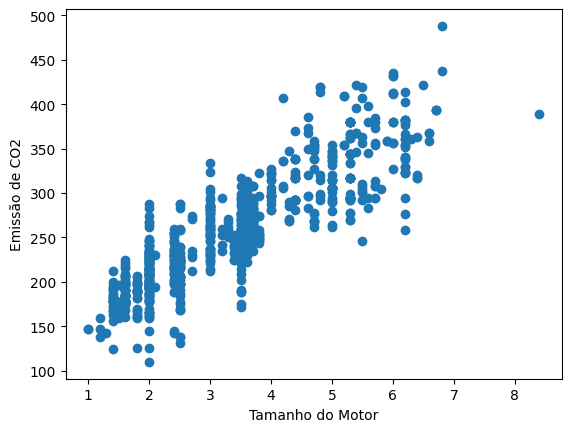

In [8]:
# Criando um gráfico de dispersão usando os dados de treino
plt.scatter(motores_treino, co2_treino)

# Adicionando rótulos aos eixos x e y
plt.xlabel('Tamanho do Motor')
plt.ylabel('Emissão de CO2')

# Exibindo o gráfico
plt.show()

In [9]:
# Criando uma instância do modelo de regressão linear
modelo = LinearRegression()

# Treinando o modelo com os dados de treino
modelo.fit(motores_treino, co2_treino)

LinearRegression()

In [10]:
# Imprimindo o intercepto (A) do modelo
print('(A) Intercepto:', modelo.intercept_)

# Imprimindo a inclinação (B) do modelo
print('(B) Inclinação:', modelo.coef_)

(A) Intercepto: [126.28970217]
(B) Inclinação: [[38.99297872]]


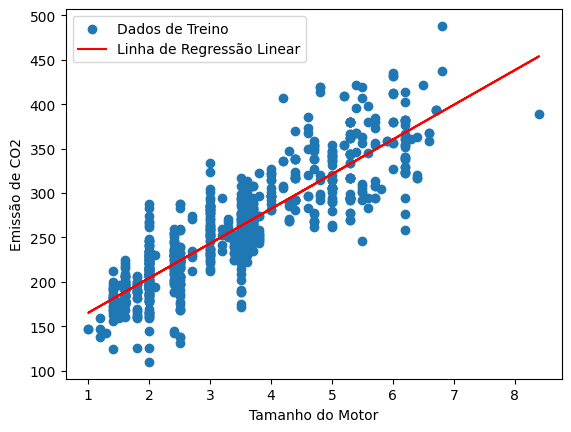

In [11]:
# Criando um gráfico de dispersão usando os dados de treino
plt.scatter(motores_treino, co2_treino, label='Dados de Treino')

# Plotando a linha de regressão linear usando os coeficientes do modelo
plt.plot(motores_treino, modelo.coef_[0][0]*motores_treino + modelo.intercept_[0], '-r', label='Linha de Regressão Linear')

# Adicionando rótulos aos eixos x e y
plt.xlabel('Tamanho do Motor')
plt.ylabel('Emissão de CO2')

# Adicionando uma legenda
plt.legend()

# Exibindo o gráfico
plt.show()

In [12]:
# Gerando previsões de emissão de CO2 usando o modelo treinado nos dados de teste
predicoesCo2 = modelo.predict(motores_teste)

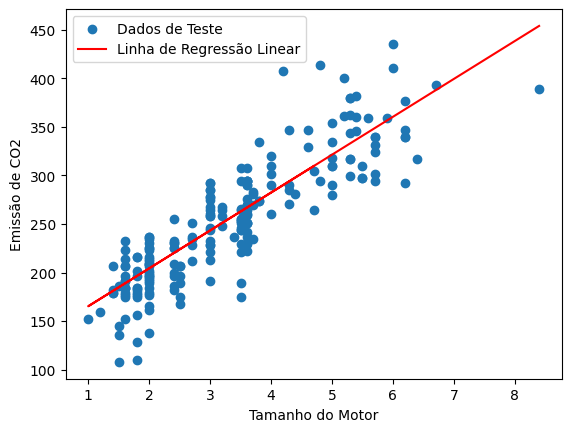

In [13]:
# Criando um gráfico de dispersão usando os dados de teste
plt.scatter(motores_teste, co2_teste, label='Dados de Teste')

# Plotando a linha de regressão linear usando os coeficientes do modelo
plt.plot(motores_teste, modelo.coef_[0][0]*motores_teste + modelo.intercept_[0], '-r', label='Linha de Regressão Linear')

# Adicionando rótulos aos eixos x e y
plt.xlabel('Tamanho do Motor')
plt.ylabel('Emissão de CO2')

# Adicionando uma legenda
plt.legend()

# Exibindo o gráfico
plt.show()


In [14]:
# Calculando as principais métricas
print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((predicoesCo2 - co2_teste)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(co2_teste, predicoesCo2))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(co2_teste, predicoesCo2))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % sqrt(mean_squared_error(co2_teste, predicoesCo2)))
print("R2-score: %.2f" % r2_score(predicoesCo2 , co2_teste) )

Soma dos Erros ao Quadrado (SSE): 210991 
Erro Quadrático Médio (MSE): 985.94
Erro Médio Absoluto (MAE): 24.10
Raiz do Erro Quadrático Médio (RMSE): 31.40 
R2-score: 0.68
